<a href="https://colab.research.google.com/github/SachinSelvaraj06/DATA-SCIENCE/blob/main/MOVIE%20RATING%20PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-2 MOVIE RATING PREDICTION**

AUTHOR:SACHIN S

BATCH :MAY

DOMAIN:DATA SCIENCE

AIM   :TO BUILD A MODEL THAT PREDICTS THE RATING OF A MOVIEBASED ON FEATURE LIKE GENRE,DIRECTOR AND ACTORS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/IMDb Movies India.csv",encoding='latin')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
df.shape

(15509, 10)

In [7]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([missing_count],
                       axis=1,
                       keys=['missing_count'])
missing_data

,missing_count
Duration,8269
Rating,7590
Votes,7589
Actor 3,3144
Actor 2,2384
Genre,1877
Actor 1,1617
Year,528
Director,525
Name,0


In [10]:
df.dropna(subset=['Rating'], inplace=True)
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    26.11
Actor 3      3.69
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [11]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [12]:
df.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [16]:
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in df['Year']:
    if len(val.split('(')) == 1:
            year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
            year_lst.append(val.split('(')[1])
df['Year'] = year_lst

df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 649.5+ KB


In [17]:

  df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
  df['Duration'].fillna(df['Duration'].mean(), inplace=True)

  df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [18]:
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


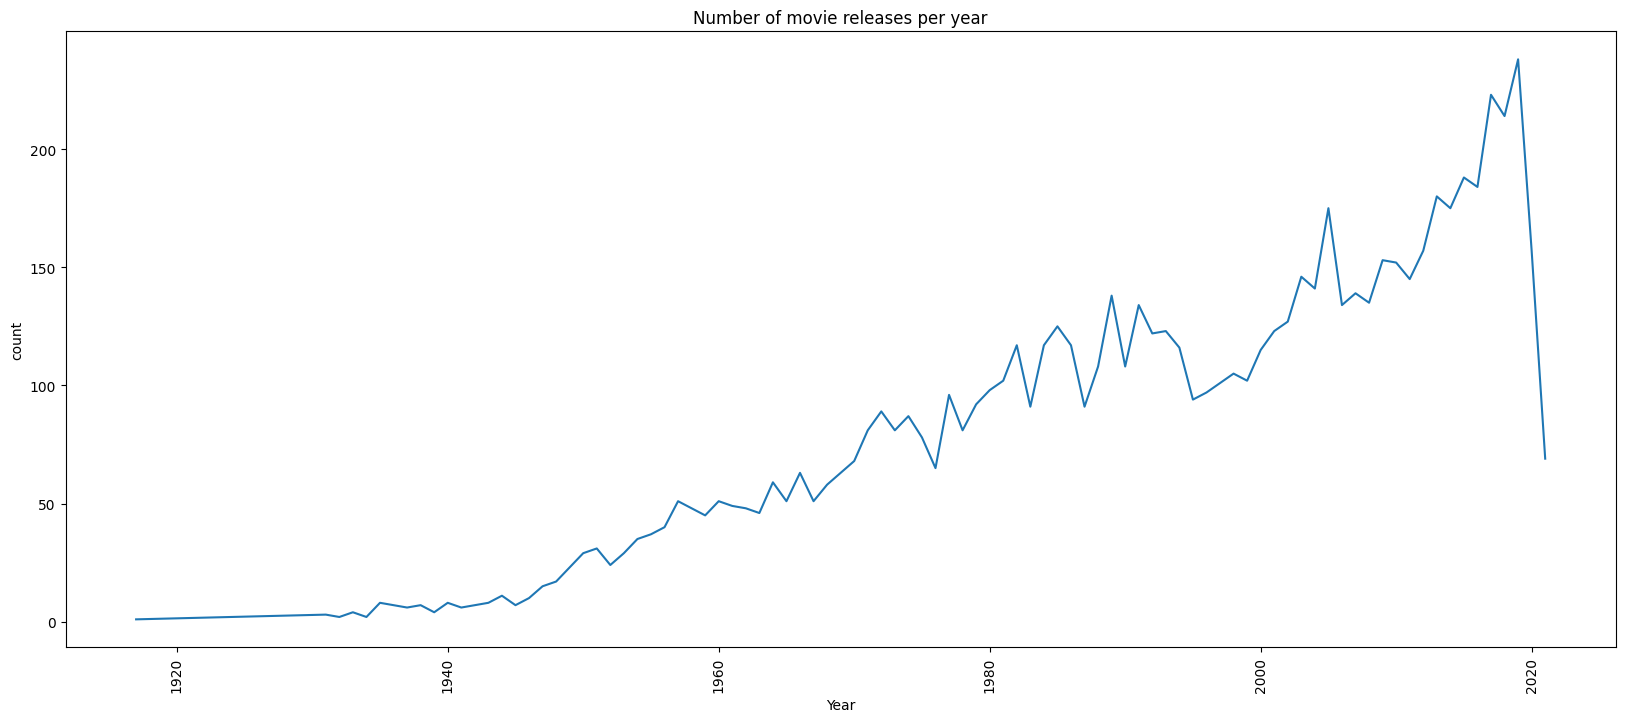

In [19]:
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=year_count, x='Year', y='count')
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

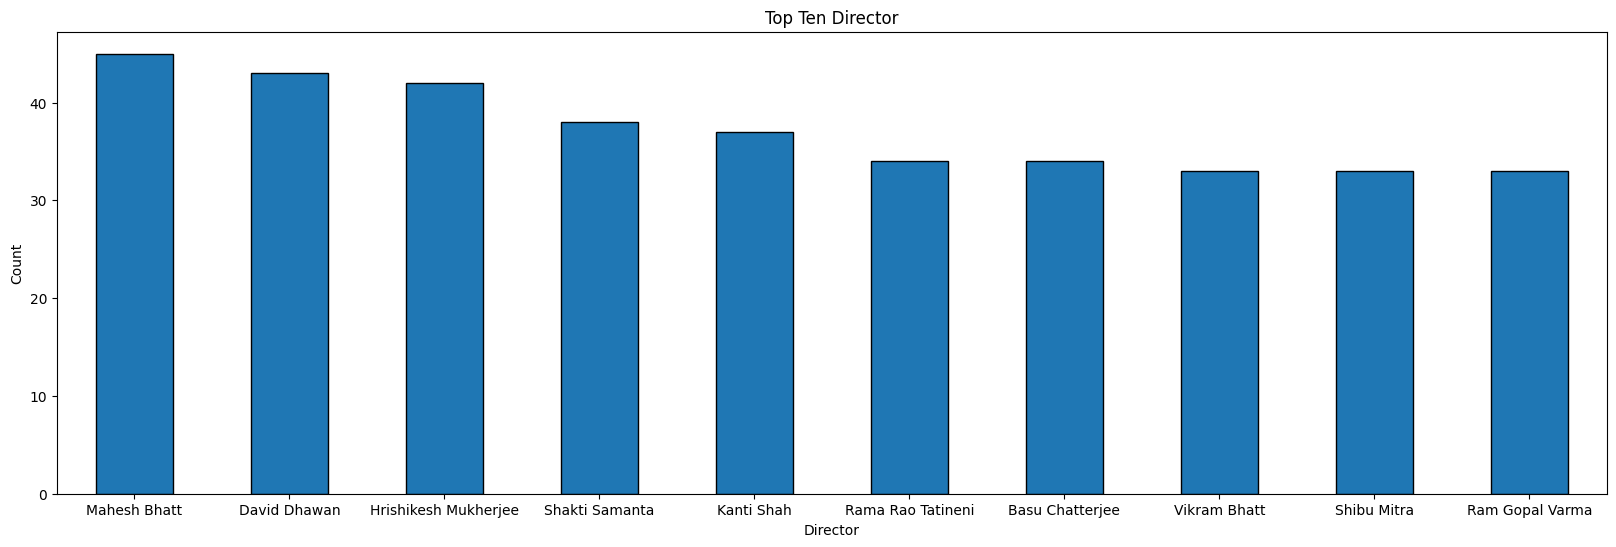

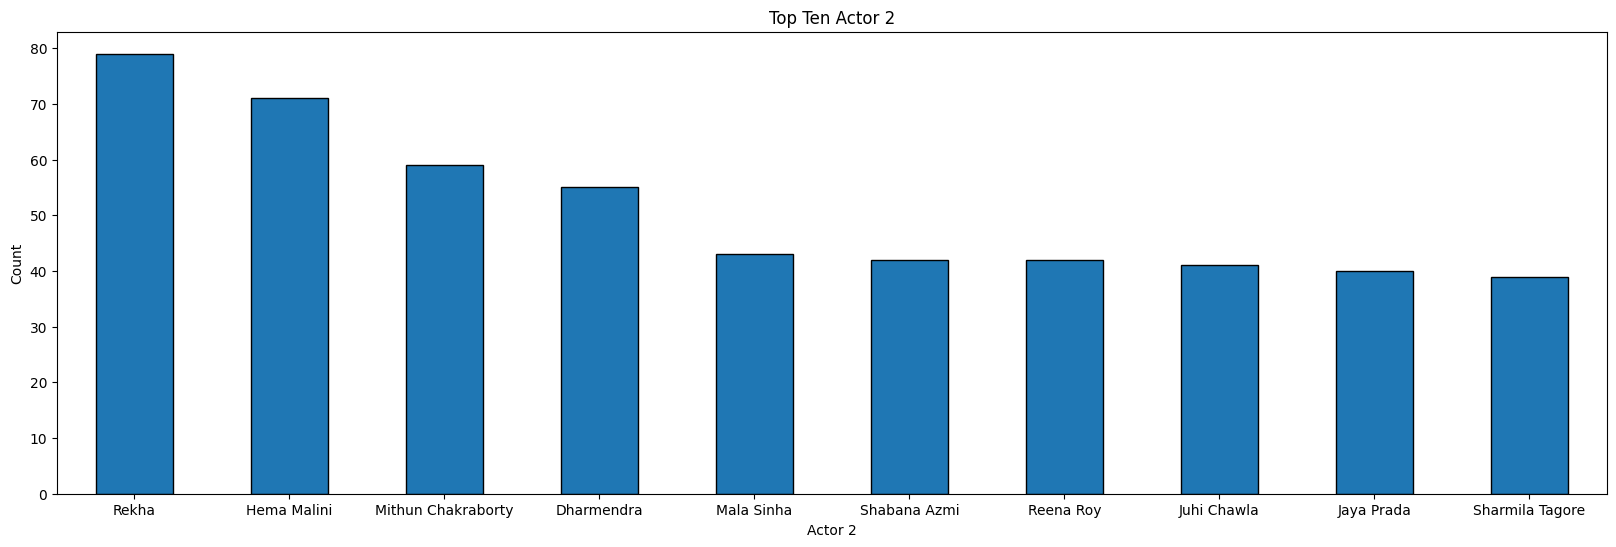

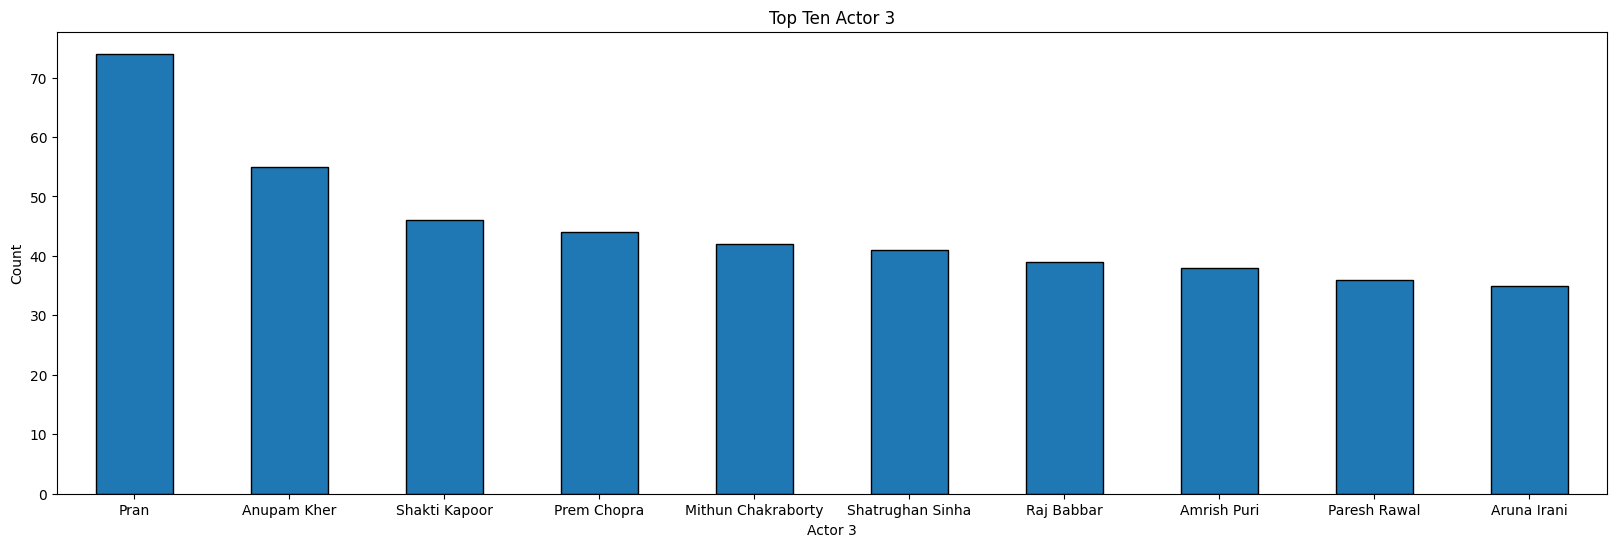

In [23]:

def TopTenPlot(column):
      global df
      df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
      plt.xticks(rotation=0)
      plt.title("Top Ten {}".format(column))
      plt.xlabel(column)
      plt.ylabel("Count")
      plt.show()

#displaying top ten directors
TopTenPlot("Director")
#displaying top ten actors 2
TopTenPlot("Actor 2")
#displaying top ten actors 3
TopTenPlot("Actor 3")

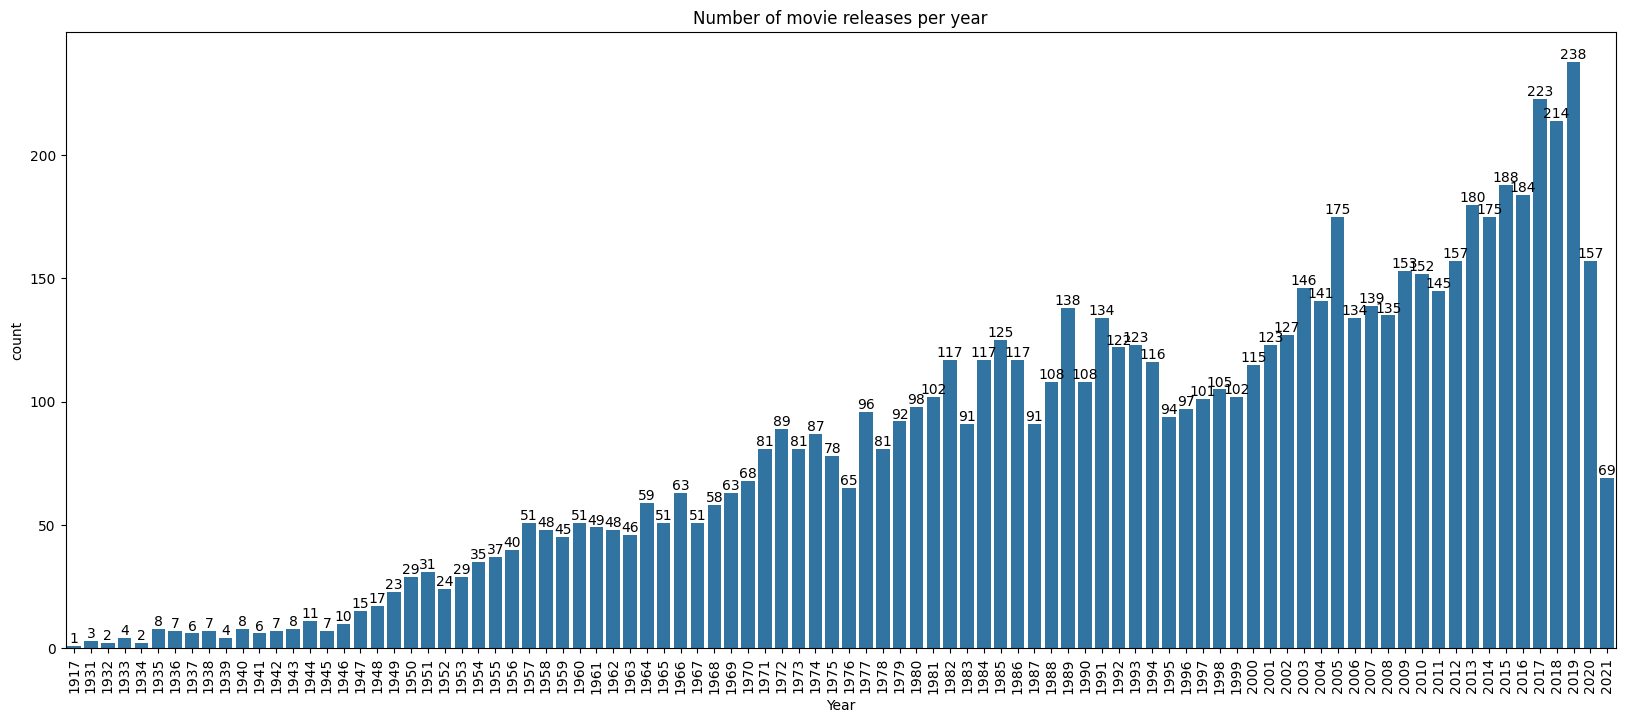

In [24]:
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

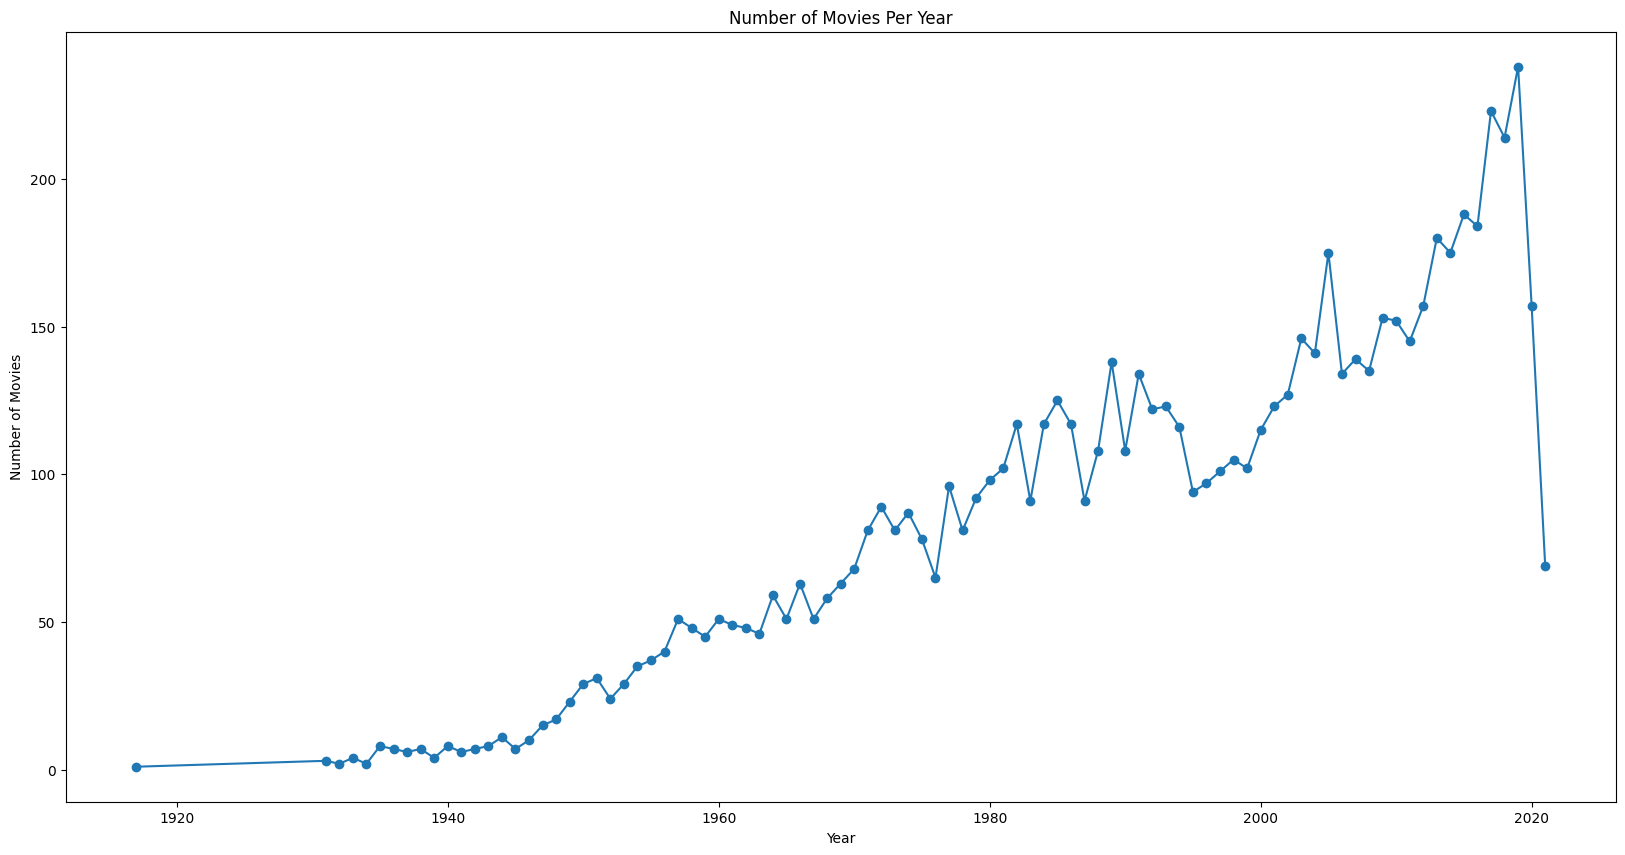

In [25]:

plt.figure(figsize=(20, 10))

year_counts = df['Year'].value_counts().sort_index()
years = year_counts.index

plt.plot(years, year_counts, marker='o' )

plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')


plt.show()

**REGRESSION**

In [26]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [27]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')


print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.4479143868804717
Mean absolute error:  0.4985453498254463
R2 score:  0.7582548854408168


The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.37288552645502654
Mean absolute error:  0.42421031746031757
R2 score:  0.7987489195465673


In [31]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109.0,6.345910,7.000000,6.850000,7.000000,7.000000
3,2019,35,110.0,5.700000,4.400000,5.420000,4.400000,4.450000
5,1997,827,147.0,6.224490,5.358824,4.788889,5.786667,5.766667
6,2005,1086,142.0,6.820000,7.500000,5.300000,6.050000,6.500000
8,2012,326,82.0,5.463636,5.600000,5.600000,5.883333,5.600000


In [32]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [33]:
data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Genre_mean_rating': [4.5], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
af = pd.DataFrame(data)

In [34]:
# Predict the movie rating
predicted_rating = rf.predict(af)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.791999999999994
